In [1]:
from pandas.plotting import scatter_matrix
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
query = '''SELECT t.uid,
                  AVG((CAST(strftime('%s', t.first_commit_ts) AS INTEGER) - d.deadlines) / 3600) AS avg_diff,
                  (SELECT COUNT(*)
                  FROM pageviews
                  WHERE uid LIKE 'user%'
                  AND uid = t.uid) AS pageviews,
                  (SELECT COUNT(*)
                  FROM checker
                  WHERE uid LIKE 'user%'
                  AND labname != 'project1'
                  AND uid = t.uid) AS num_commits
FROM test t
JOIN deadlines d
ON t.labname = d.labs
WHERE d.labs != 'project1'
GROUP BY t.uid
'''
df = pd.read_sql(query, con)
df

,uid,avg_diff,pageviews,num_commits
0,user_1,-64.400000,28,62
1,user_10,-74.800000,89,20
2,user_14,-159.000000,143,61
3,user_17,-61.600000,47,51
4,user_18,-5.666667,3,5
5,user_19,-98.750000,16,118
6,user_21,-95.500000,10,65
7,user_25,-92.600000,179,79
8,user_28,-86.400000,149,60
9,user_3,-105.400000,317,18


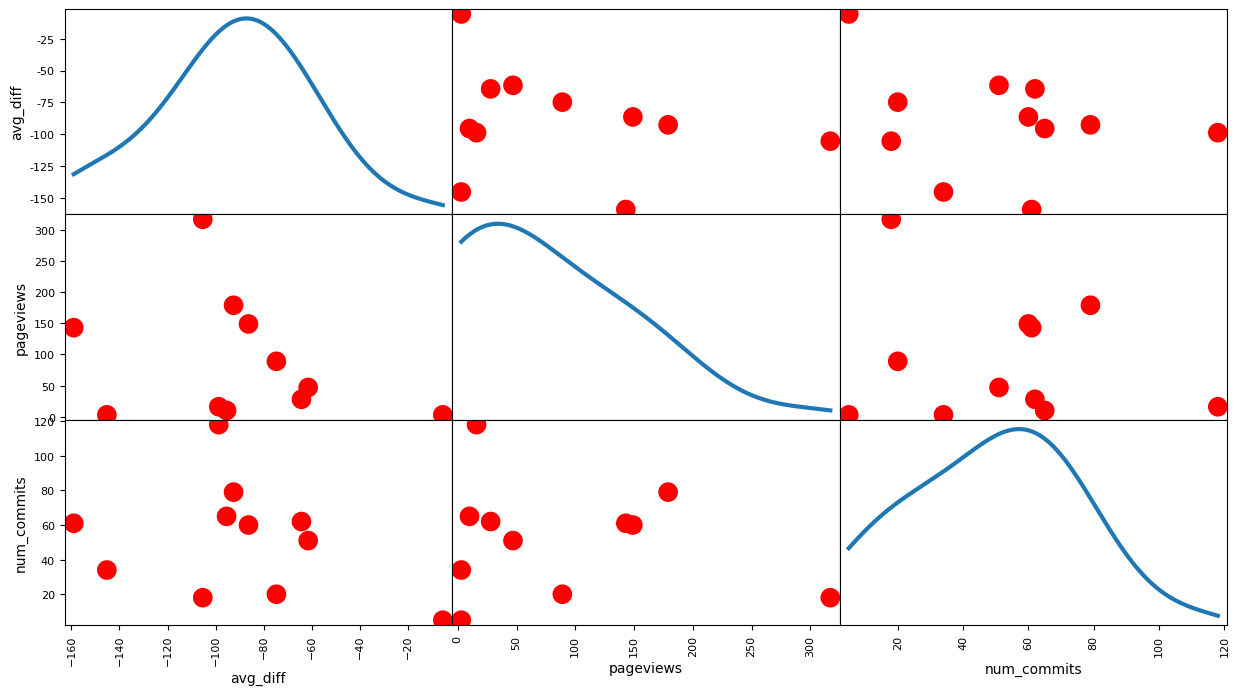

In [4]:
scatter_matrix(df,figsize=(15,8),s=200,diagonal='kde',c='r',alpha=1,marker='o',density_kwds=dict(linewidth=3))
plt.show()

Can we say that if a user has a low number of pageviews then they likely have a low number of commits?

No

Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?

No

Can we say that there are many users with a low number of commits and a few with a high number of commits”? 

Yes

Can we say that there are many users with a small average difference and a few with a large average difference”

No

In [5]:
con.close()